<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/AR-US-population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 - Dic 2018 (96 datos, 8 años)

In [ ]:
import pandas as pd 
import numpy as np 
%matplotlib inline 

#Load specific forecasting tools 
from statsmodels.tsa.ar_model import AR,ARResults #Forma diferente de obtener un modelo autoregresivo. Y la misma función me estime la cantidad de retornos
#Load the U.S Population dataset
df= pd.read_csv('./uspopulation.csv', index_col=0, parse_dates=True)
df.index.freq='MS'

In [98]:
len(df) #96

train= df.iloc[:84]
test = df.iloc[84:]

GRAFICO DE LA SERIE

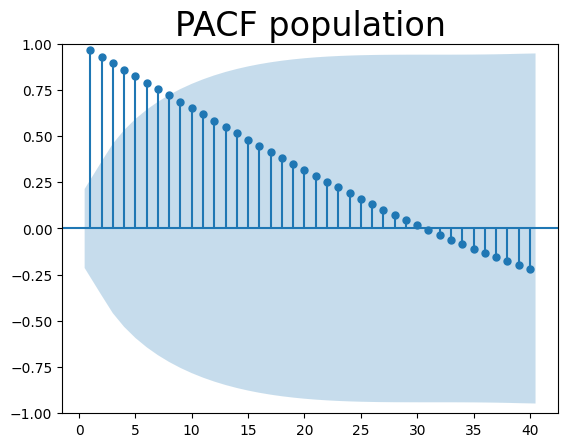

In [100]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt

sgt.plot_acf(train, zero = False, lags = 40)
plt.title("PACF population", size=24)
plt.show()
#8 retrasos apropiado


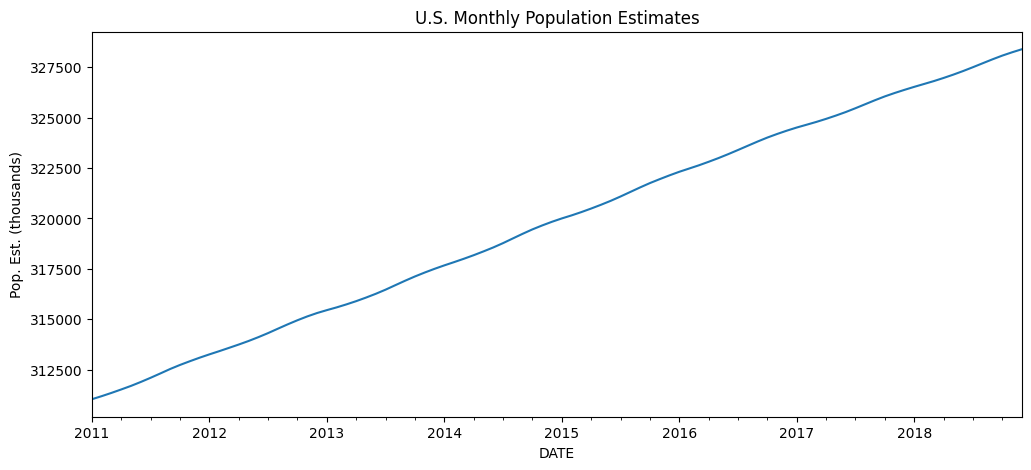

In [ ]:
title='U.S. Monthly Population Estimates'
ylabel = 'Pop. Est. (thousands)'

ax= df['PopEst'].plot(figsize=(12,5), title=title);
ax.autoscale(axis='x',tight= True)
ax.set(ylabel=ylabel);

#Datos entrenamiento/prueba 

In [ ]:
len(df) #96

train= df.iloc[:84]
test = df.iloc[84:]

#MODELO AR(1)

In [ ]:
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, AutoRegResults

In [ ]:
model = AutoReg(train['PopEst'], lags=1)
AR1fit = model.fit()
print(f'Lag: {AR1fit.ar_lags}')
print(f'Coefficients:\n{AR1fit.params}')

#Funcion AR solo le pasamos los datos train, maxlag retrazos que le damos, por el metodo de maxima verosimilitud
#maximizando la verosimilitud logra  estimar consistentemente los parametros. 
#maxlag considera todos los retrasos anteriores al puesto para elegir el mejor modelo 

Lag: [1]
Coefficients:
const        284.913797
PopEst.L1      0.999686
dtype: float64


In [ ]:
start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions1= AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [ ]:
len(test)

12

In [ ]:
#Comparando predicciones con valores reales
for i in range(len(predictions1)):   ##11.10 definir decimales visual
  print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")
  #print valores predichos y esperados 

predicted=326560.4034, expected=326527
predicted=326742.7495, expected=326669
predicted=326925.0383, expected=326812
predicted=327107.2698, expected=326968
predicted=327289.4442, expected=327134
predicted=327471.5613, expected=327312
predicted=327653.6212, expected=327502
predicted=327835.6239, expected=327698
predicted=328017.5695, expected=327893
predicted=328199.4579, expected=328077
predicted=328381.2892, expected=328241
predicted=328563.0633, expected=328393


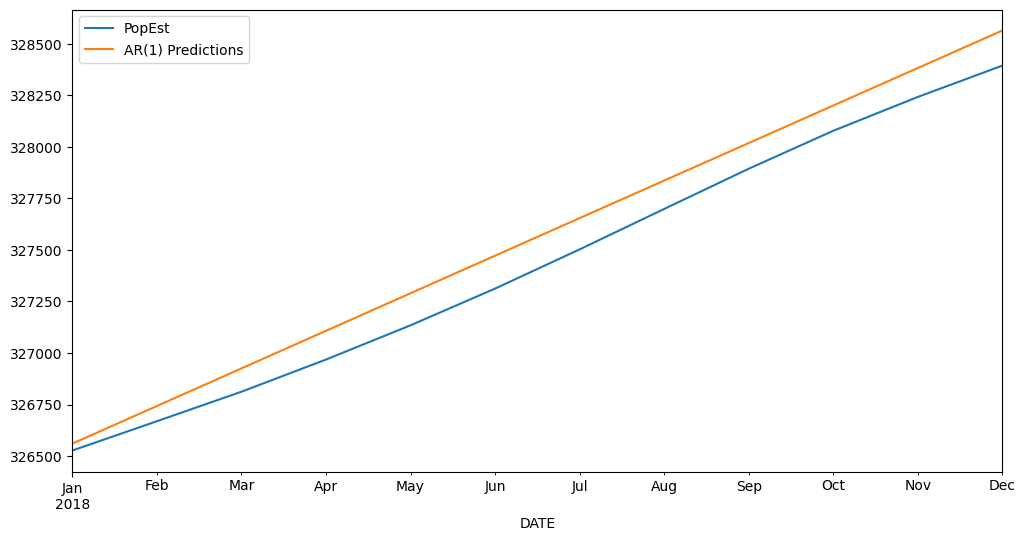

In [ ]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True, figsize=(12,6));

#MODELOS AR(2)

In [ ]:
#Recall that our model was already created above based on the training set
model = AutoReg(train['PopEst'], lags=2)
AR2fit = model.fit()
print(f'Lag: {AR2fit.ar_lags}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: [1, 2]
Coefficients:
const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64


In [ ]:
start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions2= AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

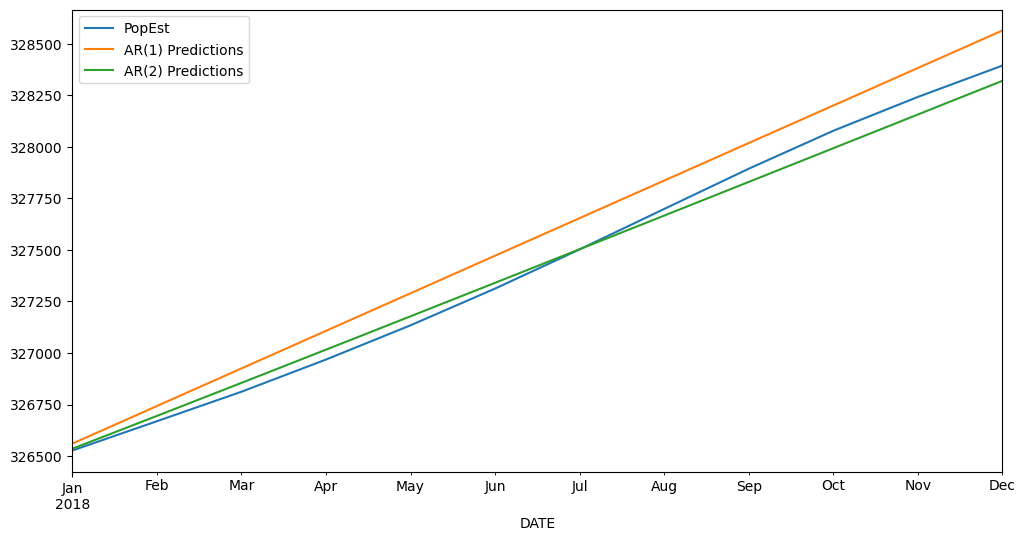

In [ ]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3]
Coefficients:
const        91.742944
PopEst.L1     2.589781
PopEst.L2    -2.435443
PopEst.L3     0.845522
dtype: float64


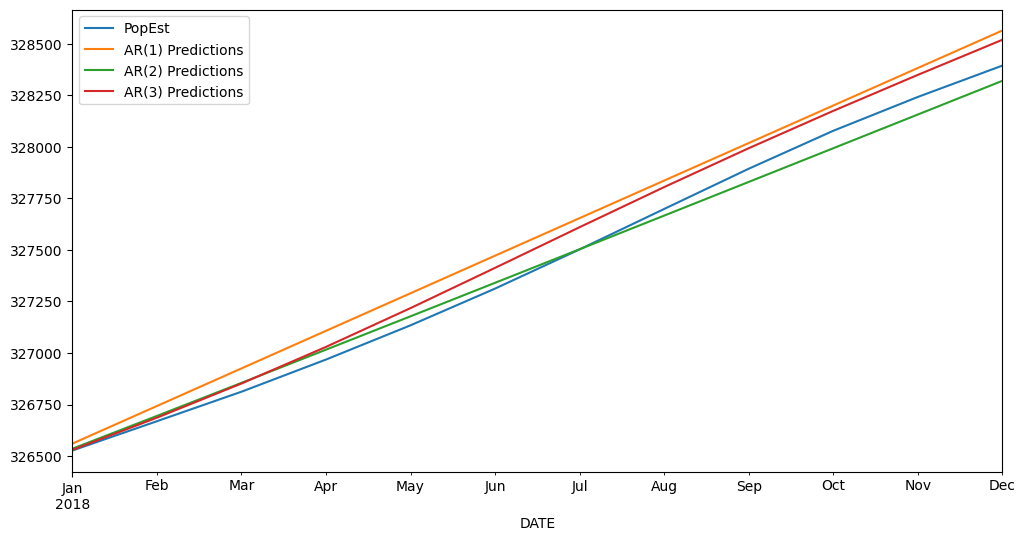

In [65]:
model = AutoReg(train['PopEst'], lags=3)
AR3fit = model.fit()
print(f'Lag: {AR3fit.ar_lags}')
print(f'Coefficients:\n{AR3fit.params}')

start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions3= AR3fit.predict(start=start, end=end, dynamic=False).rename('AR(3) Predictions')

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True);
predictions3.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3, 4]
Coefficients:
const        113.461933
PopEst.L1      2.470586
PopEst.L2     -2.095342
PopEst.L3      0.482154
PopEst.L4      0.142418
dtype: float64


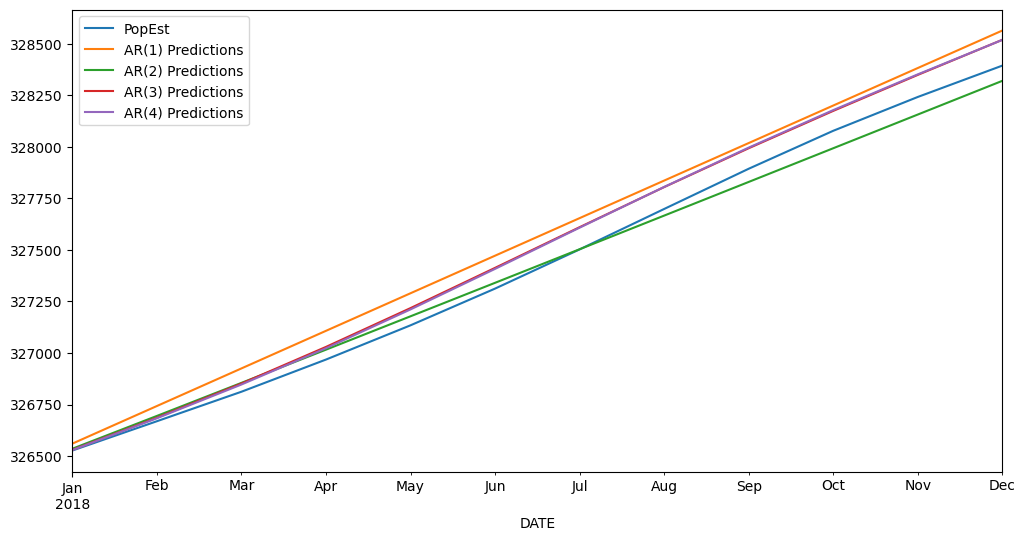

In [ ]:
model = AutoReg(train['PopEst'], lags=4)
AR4fit = model.fit()
print(f'Lag: {AR4fit.ar_lags}')
print(f'Coefficients:\n{AR4fit.params}')


start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions4= AR4fit.predict(start=start, end=end, dynamic=False).rename('AR(4) Predictions')


test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True);
predictions3.plot(legend=True);
predictions4.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3, 4, 5]
Coefficients:
const        157.070791
PopEst.L1      2.406440
PopEst.L2     -2.215559
PopEst.L3      1.145028
PopEst.L4     -0.674185
PopEst.L5      0.338017
dtype: float64


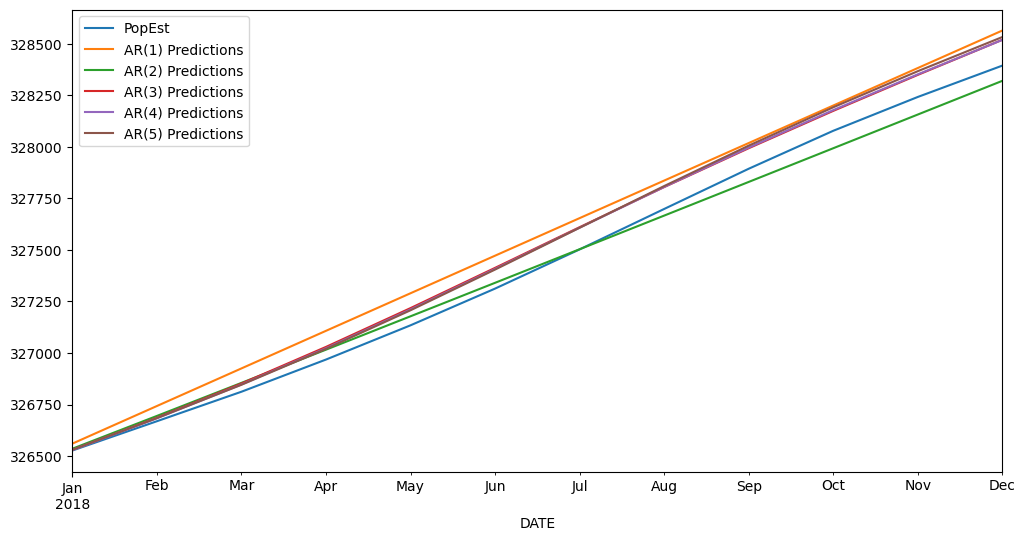

In [ ]:
model = AutoReg(train['PopEst'], lags=5)
AR5fit = model.fit()
print(f'Lag: {AR5fit.ar_lags}')
print(f'Coefficients:\n{AR5fit.params}')


start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions5= AR5fit.predict(start=start, end=end, dynamic=False).rename('AR(5) Predictions')


test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True);
predictions3.plot(legend=True);
predictions4.plot(legend=True);
predictions5.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3, 4, 5, 6]
Coefficients:
const        124.821162
PopEst.L1      2.480391
PopEst.L2     -2.359463
PopEst.L3      1.350893
PopEst.L4     -1.047476
PopEst.L5      0.753700
PopEst.L6     -0.178250
dtype: float64


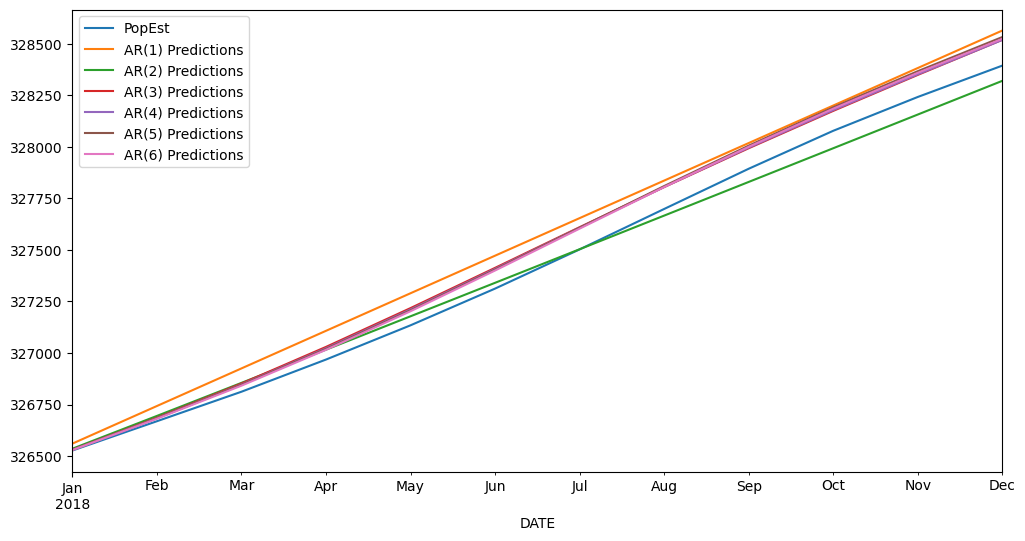

In [ ]:
model = AutoReg(train['PopEst'], lags=6)
AR6fit = model.fit()
print(f'Lag: {AR6fit.ar_lags}')
print(f'Coefficients:\n{AR6fit.params}')


start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions6= AR6fit.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')


test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True);
predictions3.plot(legend=True);
predictions4.plot(legend=True);
predictions5.plot(legend=True);
predictions6.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3, 4, 5, 6, 7]
Coefficients:
const        122.648966
PopEst.L1      2.469604
PopEst.L2     -2.308858
PopEst.L3      1.276892
PopEst.L4     -0.941764
PopEst.L5      0.559511
PopEst.L6      0.025066
PopEst.L7     -0.080663
dtype: float64


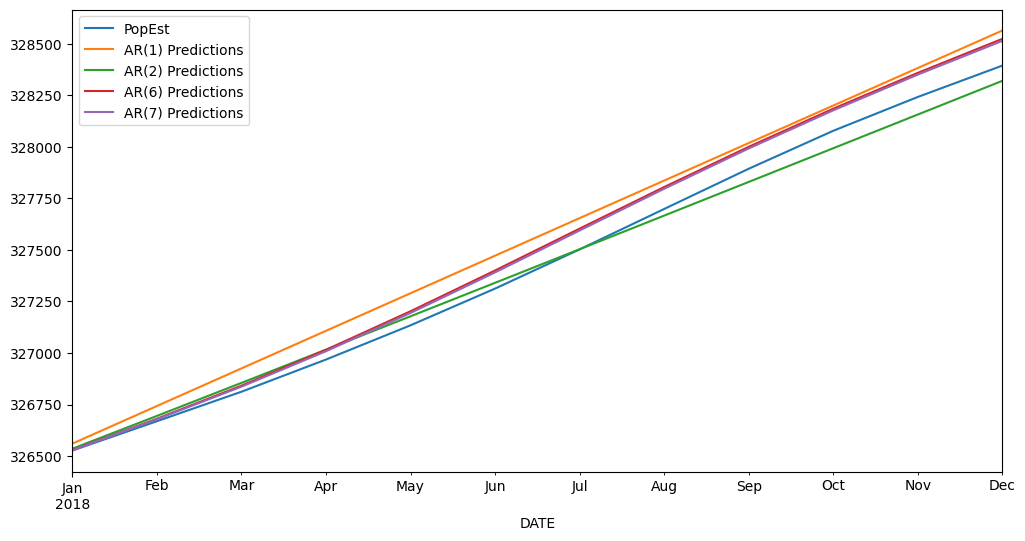

In [66]:
model = AutoReg(train['PopEst'], lags=7)
AR7fit = model.fit()
print(f'Lag: {AR7fit.ar_lags}')
print(f'Coefficients:\n{AR7fit.params}')


start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions7= AR7fit.predict(start=start, end=end, dynamic=False).rename('AR(7) Predictions')


test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True);
# predictions3.plot(legend=True);
# predictions4.plot(legend=True);
# predictions5.plot(legend=True);
predictions6.plot(legend=True);
predictions7.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3, 4, 5, 6, 7, 8]
Coefficients:
const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64


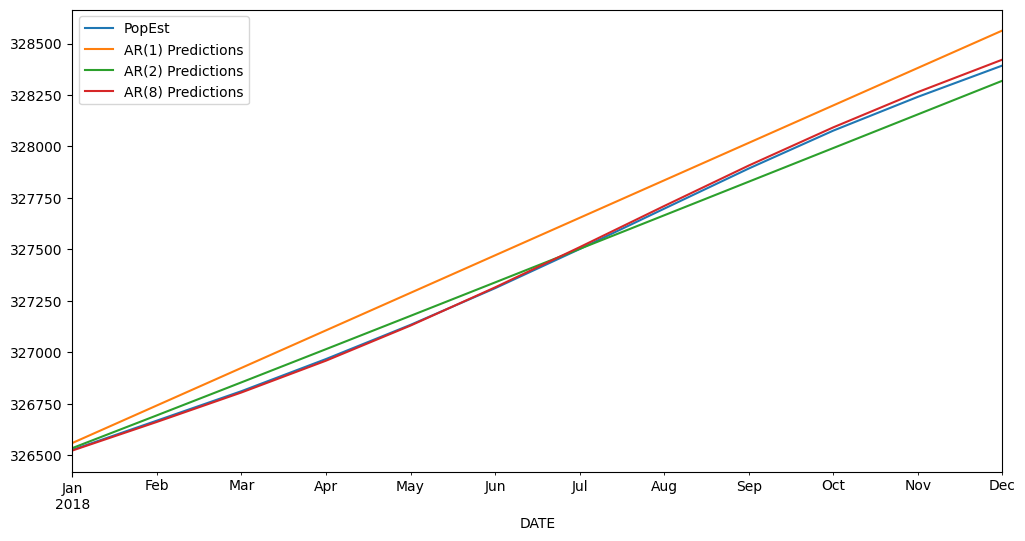

In [72]:
model = AutoReg(train['PopEst'], lags=8)
AR8fit = model.fit()
print(f'Lag: {AR8fit.ar_lags}')
print(f'Coefficients:\n{AR8fit.params}')

start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions8= AR8fit.predict(start=start, end=end, dynamic=False).rename('AR(8) Predictions')

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True);
predictions8.plot(legend=True, figsize=(12,6));

Lag: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Coefficients:
const        71.946530
PopEst.L1     2.333082
PopEst.L2    -2.057570
PopEst.L3     1.321061
PopEst.L4    -1.139055
PopEst.L5     0.765321
PopEst.L6    -0.569809
PopEst.L7     0.490520
PopEst.L8     0.079870
PopEst.L9    -0.223593
dtype: float64


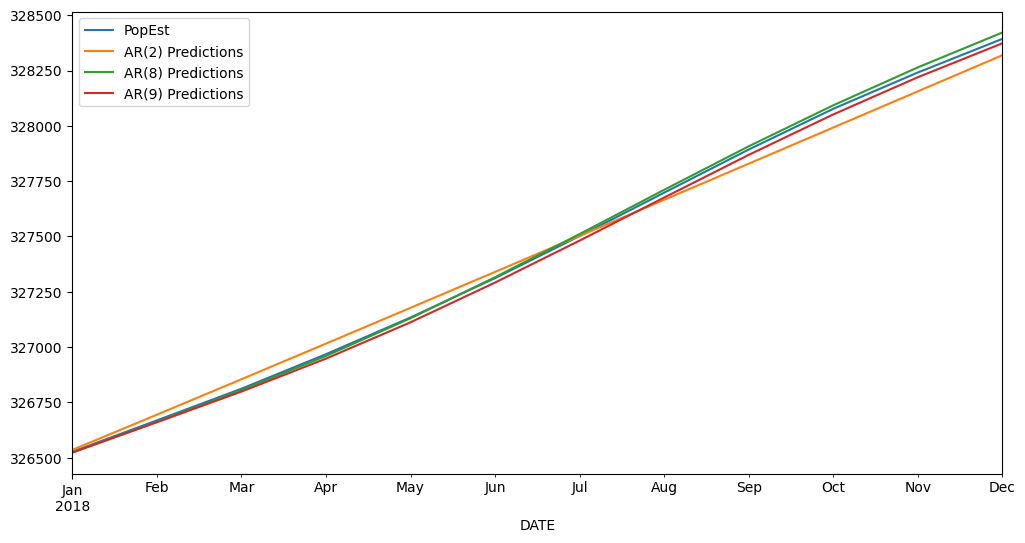

In [80]:
model = AutoReg(train['PopEst'], lags=9)
AR9fit = model.fit()
print(f'Lag: {AR9fit.ar_lags}')
print(f'Coefficients:\n{AR9fit.params}')


start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictions9= AR9fit.predict(start=start, end=end, dynamic=False).rename('AR(9) Predictions')


test['PopEst'].plot(legend=True)
predictions2.plot(legend=True);
predictions8.plot(legend=True);
predictions9.plot(legend=True, figsize=(12,6));

#MODELOS AR(P) statsmodels automatico:P 

Lag: [1, 2, 3, 4, 5, 6, 7, 8]
Coefficients:
const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64


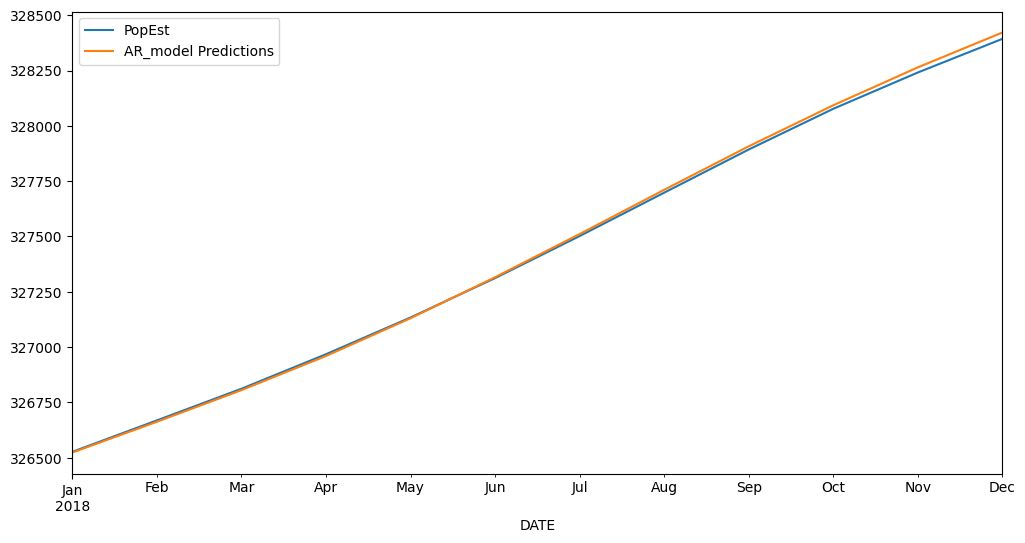

In [83]:
ar_model = AutoReg(train['PopEst'], lags=[1,2,3,4,5,6,7,8]).fit()
print(f'Lag: {ar_model.ar_lags}')
print(f'Coefficients:\n{ar_model.params}')

start=len(train) #inicia con el conjunto de entrenamiento
end=len(train)+len(test)-1 #termina con el cojunto de train junto con el conjunto de prueba 
predictionsAU= ar_model.predict(start=start, end=end, dynamic=False).rename('AR_model Predictions')

test['PopEst'].plot(legend=True)
predictionsAU.plot(legend=True, figsize=(12,6));

In [60]:
from scipy.stats.distributions import chi2

def LLR_test(model_1, model_2, DF=1):
  #hallamos las log-verosimilitudes de los modelos para ello usamos el metodo .llf
  L1 = model_1.llf
  L2 = model_2.llf
  LR = (2*(L2-L1)) #Estadistico
  p = chi2.sf(LR, DF).round(3) #distribución del estadistico es una CHI2, por el estadiscito los grado de libertad y se redondea a  decimales.
  return p

In [ ]:
print(LLR_test(AR5fit, AR6fit, DF=4)), print(LLR_test(AR6fit, AR7fit, DF=1)),print(LLR_test(AR8fit, AR9fit, DF=1)) 
print(LLR_test(AR7fit, AR8fit, DF=1)) #Elegido
print(LLR_test(AR2fit, AR8fit, DF=1)) #Elegido

#Evaluar el modelo 

Error cuadráditico medio: Mean Squeared Error (MSE)

In [85]:
from sklearn.metrics import mean_squared_error
labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]

for i in range(3):
  error = mean_squared_error(test['PopEst'], preds[i])  #calculamos el error con respecto a los datos reales del conjunto de prueba
  print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 2713.258563
AR(8) Error: 186.9732037


In [91]:
modls = [AR1fit, AR2fit, AR8fit]

for i in range(3):
  print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 767.64
AR(2) AIC: 649.21
AR(8) AIC: 488.35


#Predicciones

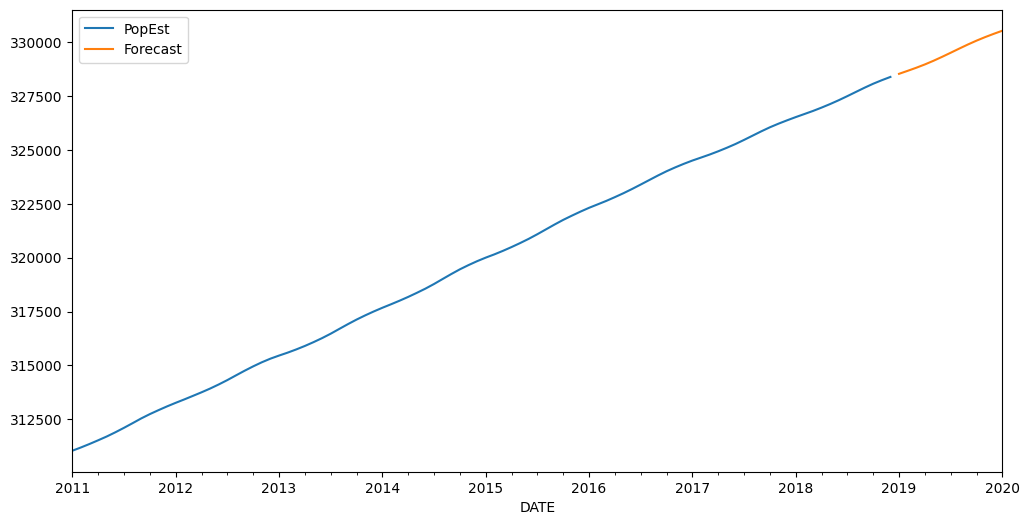

In [93]:
#First, retrain the model on the full dataset // vuelva a entrenar el modelo en el conjunto de datos completo
model = AutoReg(df['PopEst'], lags=8)

#Next, fit the model 
ARfit = model.fit()

#Make predictions
fcast= ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

#Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True, figsize=(12,6));

In [94]:
fcast

2019-01-01    328537.134651
2019-02-01    328675.917668
2019-03-01    328818.863445
2019-04-01    328973.057044
2019-05-01    329142.516013
2019-06-01    329325.479628
2019-07-01    329516.233675
2019-08-01    329709.938214
2019-09-01    329899.389426
2019-10-01    330077.704648
2019-11-01    330242.358657
2019-12-01    330394.543321
2020-01-01    330538.845784
Freq: MS, Name: Forecast, dtype: float64